In [1]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

import os
import IPython.display

In [2]:
def load(file_name):
    wav = file_name
    file_sr = librosa.get_samplerate(wav)

    y, sr = librosa.load(wav, sr=file_sr)
    return y, sr

In [56]:
def Time_Stretching(input_directory, output_directory):
    file_list = os.listdir(input_directory)
    
    for file in file_list:
        y, sr = load(input_directory+file)
        kind = 0.7, 0.8, 1.2, 1.3
        ratio = np.random.choice(kind)
        ratio = np.trunc(ratio * 10) / 10
        
        new_audio = librosa.effects.time_stretch(y,ratio)
        sf.write(output_directory+ str(ratio) + "speed_" + file, new_audio, sr, subtype='PCM_16')   

In [8]:
def Pitch_Shifting(input_directory, output_directory):
    file_list = os.listdir(input_directory)
    
    for file in file_list:
        y, sr = load(input_directory+file)
        kind = -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5
        ratio = np.random.choice(kind)
        new_audio = librosa.effects.pitch_shift(y,sr,n_steps=ratio)
        sf.write(output_directory+ "X"+str(ratio) + "_" + file, new_audio, sr, subtype='PCM_16')   

In [54]:
def Both(input_directory, output_directory):
    file_list = os.listdir(input_directory)
    
    for file in file_list:
        y, sr = load(input_directory+file)
        T_ratio = np.random.uniform(0.9,1.11)
        T_ratio = np.trunc(T_ratio * 10) / 10
        P_ratio = np.random.randint(-2,3)
        new_audio = librosa.effects.time_stretch(y,T_ratio)
        new_audio = librosa.effects.pitch_shift(new_audio,sr,n_steps=P_ratio)
        
        sf.write(output_directory+ str(T_ratio) + "speed_" + "X"+str(P_ratio) + "_" + file, new_audio, sr, subtype='PCM_16')   

In [3]:
def reverse(input_directory, output_directory):
    file_list = os.listdir(input_directory)
    
    for file in file_list:
        y, sr = load(input_directory+file)
        reverse_y = np.flip(y)
        sf.write(output_directory + "reverse_" + file, reverse_y, sr, subtype='PCM_16')

In [250]:
Time_Stretching('augmentation/normalization/test/fire/', 'augmentation/speed/test/fire/')
Time_Stretching('augmentation/normalization/test/non/', 'augmentation/speed/test/non/')

Time_Stretching('augmentation/normalization/train/fire/', 'augmentation/speed/train/fire/')
Time_Stretching('augmentation/normalization/train/non/', 'augmentation/speed/train/non/')

In [247]:
Pitch_Shifting('augmentation/normalization/test/fire/', 'augmentation/pitch/test/fire/')
Pitch_Shifting('augmentation/normalization/test/non/', 'augmentation/pitch/test/non/')

Pitch_Shifting('augmentation/normalization/train/fire/', 'augmentation/pitch/train/fire/')
Pitch_Shifting('augmentation/normalization/train/non/', 'augmentation/pitch/train/non/')

In [10]:
Pitch_Shifting('the_little_prince/final/train/', 'the_little_prince/final2/train/')
Pitch_Shifting('the_little_prince/final/train_negative/', 'the_little_prince/final2/train_negative/')

In [254]:
#Both('augmentation/normalization/test/fire/', 'augmentation/both/test/fire/')
#Both('augmentation/normalization/test/non/', 'augmentation/both/test/non/')

Both('augmentation/normalization/train/fire/', 'augmentation/both/train/fire/')
Both('augmentation/normalization/train/non/', 'augmentation/both/train/non/')

In [61]:
for i in range(10):
    Both('augmentation/origin/train/fire/', 'augmentation/both/train/fire/')
    Both('augmentation/origin/train/non/', 'augmentation/both/train/non/')

In [62]:
for i in range(2):  
    Time_Stretching('augmentation/origin/train/fire/', 'augmentation/both/train/fire/')
    Time_Stretching('augmentation/origin/train/non/', 'augmentation/both/train/non/')
    
    Pitch_Shifting('augmentation/origin/train/fire/', 'augmentation/both/train/fire/')
    Pitch_Shifting('augmentation/origin/train/non/', 'augmentation/both/train/non/')

In [9]:
reverse('background/normalization/test/', 'background/reverse/test/')
reverse('background/normalization/test_negative/', 'background/reverse/test_negative/')

reverse('background/normalization/train/', 'background/reverse/train/')
reverse('background/normalization/train_negative/', 'background/reverse/train_negative/')

In [5]:
reverse('background/background_resampling/', 'background/background_resampling_reverse/')

In [3]:
y, sr = load('test.wav')
IPython.display.Audio(data=y, rate=sr)

In [5]:
reverse_y = np.flip(y)

In [6]:
IPython.display.Audio(data=reverse_y, rate=sr)

In [66]:
input_directory = 'background/train/'

file_list = os.listdir(input_directory)

max = []
for file in file_list :
    y, sr = load(input_directory+file)
    max.append(np.max(abs(y)))
print(np.mean(max))

0.46202388


2

[ 0.06930542 -0.01803589 -0.04345703 ... -0.00424194 -0.00454712
 -0.00463867]


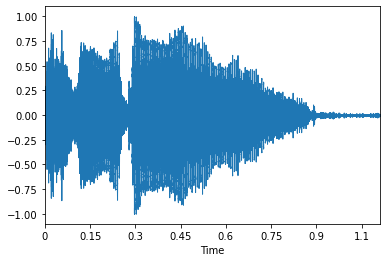

In [5]:
y, sr = load("dh2.wav")
librosa.display.waveplot(y, sr=sr)
IPython.display.Audio(data=y, rate=sr)
print(y)

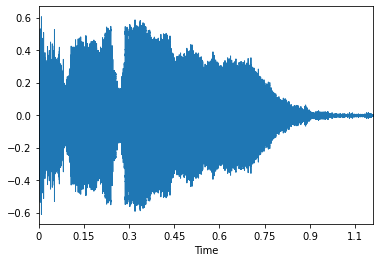

In [8]:
new_audio = librosa.effects.pitch_shift(y,sr,n_steps=5)
librosa.display.waveplot(new_audio, sr=sr)
IPython.display.Audio(data=new_audio, rate=sr)

In [7]:
new_audio

array([ 0.0522454 , -0.03500782,  0.00818277, ..., -0.00074654,
       -0.0008559 ,  0.        ], dtype=float32)

In [9]:
y-new_audio

array([ 0.01706002,  0.01697193, -0.0516398 , ..., -0.00349541,
       -0.00369122, -0.00463867], dtype=float32)

In [35]:
mfcc = librosa.feature.mfcc(y, sr=16000)
padded_mfcc = padding(mfcc, mfcc.shape[1])
librosa.display.specshow(padded_mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

NameError: name 'padding' is not defined

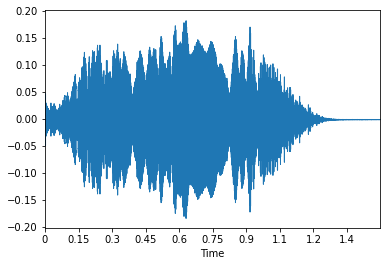

In [274]:
y, sr = load("0.7sepped_X1_dh9.wav")
librosa.display.waveplot(y, sr=sr)
IPython.display.Audio(data=y, rate=sr)

In [34]:
mfcc = librosa.feature.mfcc(y, sr=16000)
padded_mfcc = padding(mfcc, mfcc.shape[1])
librosa.display.specshow(padded_mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

NameError: name 'padding' is not defined

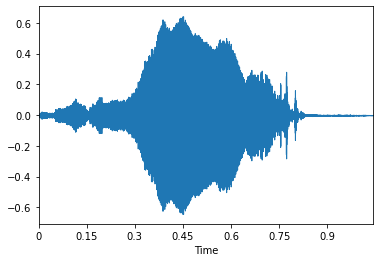

In [33]:
y, sr = load("dh3.wav")
librosa.display.waveplot(y, sr=sr)
IPython.display.Audio(data=y, rate=sr)

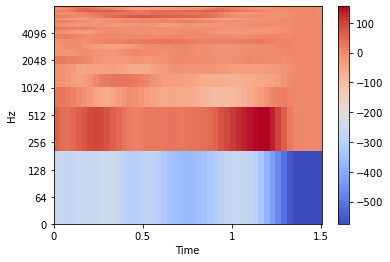

In [277]:
mfcc = librosa.feature.mfcc(y, sr=16000)
padded_mfcc = padding(mfcc, mfcc.shape[1])
librosa.display.specshow(padded_mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

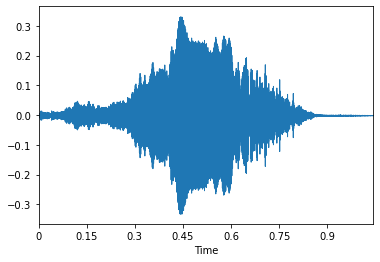

In [214]:
y, sr = load("dh3.wav")
wav_pitch_sf = librosa.effects.pitch_shift(y,sr,n_steps=5)
librosa.display.waveplot(wav_pitch_sf, sr=sr)
IPython.display.Audio(data=wav_pitch_sf, rate=sr)

In [ ]:
mfcc = librosa.feature.mfcc(y, sr=16000)
padded_mfcc = padding(mfcc, mfcc.shape[1])
librosa.display.specshow(padded_mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

In [61]:
y, sr = load("dj28.wav")
IPython.display.Audio(data=y, rate=sr)

In [62]:
wav_time_stch = librosa.effects.time_stretch(y,1.3)
IPython.display.Audio(data=wav_time_stch, rate=sr)

In [63]:
wav_time_stch = librosa.effects.pitch_shift(wav_time_stch,sr,n_steps=-5)
IPython.display.Audio(data=wav_time_stch, rate=sr)

In [68]:
y, sr = load("0.29_test.wav")

(20, 63)


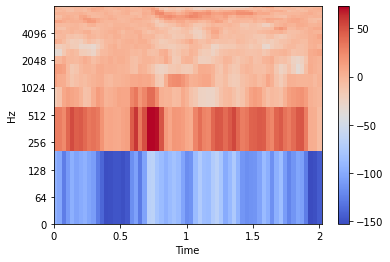

In [69]:
mfcc = librosa.feature.mfcc(y, sr=16000)
print(mfcc.shape)
librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

In [ ]:
y, sr = load("dh3.wav")
wav_time_stch = librosa.effects.pitch_shift(y,sr,n_steps=+5)
librosa.display.waveplot(wav_time_stch, sr=sr)
IPython.display.Audio(data=wav_time_stch, rate=sr)
sf.write('dh3_+5.wav', wav_time_stch, sr, subtype='PCM_16')

(20, 47)


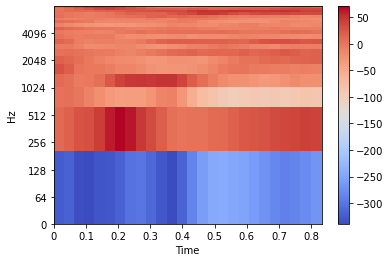

In [222]:
mfcc = librosa.feature.mfcc(wav_time_stch, sr=16000)
print(mfcc.shape)
padded_mfcc = padding(mfcc, 26)
librosa.display.specshow(padded_mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

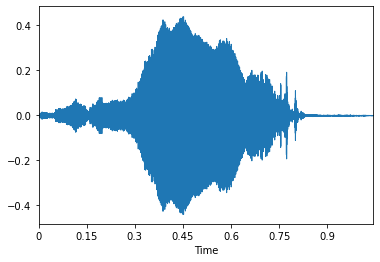

In [212]:
librosa.display.waveplot(y, sr=sr)
IPython.display.Audio(data=y, rate=sr)

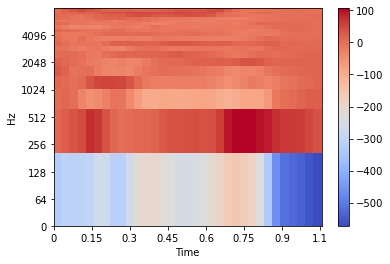

In [213]:
mfcc = librosa.feature.mfcc(y, sr=16000)
padded_mfcc = padding(mfcc, 33)
librosa.display.specshow(padded_mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

In [35]:
def padding(a, i) :
    if (a.shape[1] >= i) :
        return a[:, 0:i]
    else :
        difference = i-a.shape[1]
        zeros = np.random.randint(difference+1)
        
        #print(zeros, difference-zeros)
        
        first = np.zeros((a.shape[0], zeros))
        second = np.zeros((a.shape[0], difference - zeros))
        
        new = np.hstack((first, a))
        new = np.hstack((new, second))
        
        return new

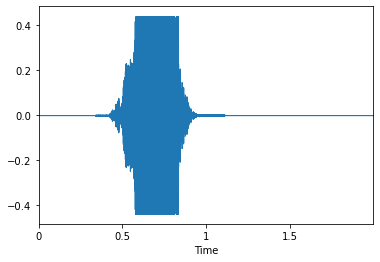

In [88]:
y, sr = load('test2.wav')
librosa.display.waveplot(y, sr=sr)

In [89]:
new = []
for i in range(len(y)):
    new.append(0)
sf.write("mute.wav", new, sr, subtype='PCM_16')

In [91]:
y, sr = load('mute.wav')
mfcc = librosa.feature.mfcc(y, sr=16000)
padded_mfcc = padding(mfcc, 63)

In [108]:
mfcc[:2]

array([[-1131.3708, -1131.3708, -1131.3708, -1131.3708, -1131.3708,
        -1131.3708, -1131.3708, -1131.3708, -1131.3708, -1131.3708,
        -1131.3708, -1131.3708, -1131.3708, -1131.3708, -1131.3708,
        -1131.3708, -1131.3708, -1131.3708, -1131.3708, -1131.3708,
        -1131.3708, -1131.3708, -1131.3708, -1131.3708, -1131.3708,
        -1131.3708, -1131.3708, -1131.3708, -1131.3708, -1131.3708,
        -1131.3708, -1131.3708, -1131.3708, -1131.3708, -1131.3708,
        -1131.3708, -1131.3708, -1131.3708, -1131.3708, -1131.3708,
        -1131.3708, -1131.3708, -1131.3708, -1131.3708, -1131.3708,
        -1131.3708, -1131.3708, -1131.3708, -1131.3708, -1131.3708,
        -1131.3708, -1131.3708, -1131.3708, -1131.3708, -1131.3708,
        -1131.3708, -1131.3708, -1131.3708, -1131.3708, -1131.3708,
        -1131.3708, -1131.3708, -1131.3708],
       [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
   

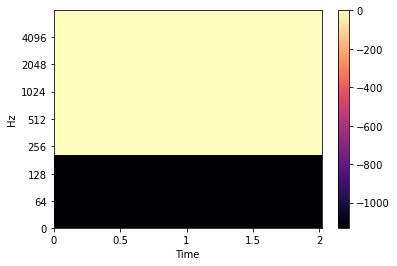

In [110]:
librosa.display.specshow(padded_mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

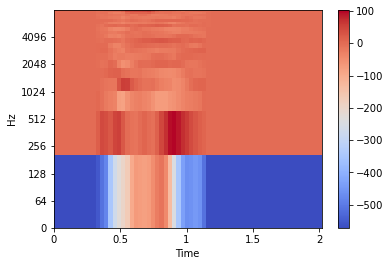

In [65]:
librosa.display.specshow(padded_mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

In [230]:

for i in range(10):
    ratio = np.random.randint(1,3)
    ratio = np.trunc(ratio)
    print(ratio)

1.0
2.0
2.0
1.0
1.0
2.0
2.0
2.0
1.0
1.0


In [27]:
y, sr = load('test2.wav')
wav_roll = np.roll(y,int(sr/10))

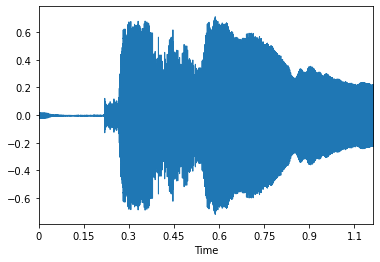

In [28]:
librosa.display.waveplot(y, sr=sr)

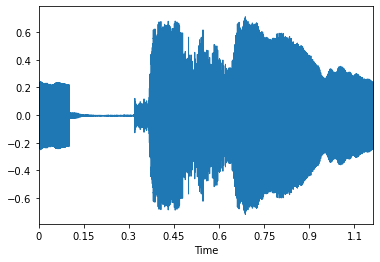

In [29]:
librosa.display.waveplot(wav_roll, sr=sr)

In [30]:
IPython.display.Audio(data=wav_roll, rate=sr)

In [31]:
IPython.display.Audio(data=y, rate=sr)